







# Basic Gradient Descent

This notebook will implement two basic machine learning models using **regression** and **gradient descent**

## Packages

Minimal packages will be needed. We will use **NumPy** and **pandas** for computing, and Matplotlib's **pyplot** for plotting.

### Documentation
- [NumPy](https://numpy.org/doc/stable/)
- [pandas](https://pandas.pydata.org/docs/index.html)
- [Matplotlib](https://matplotlib.org/stable/)


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preparation

We begin by loading our non-linear, single variable data and generating a scatter plot.


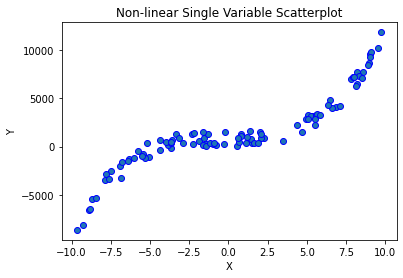

In [86]:
singleVariableData = pd.read_csv("data_nonlinear.csv")

plt.scatter(singleVariableData['X'], singleVariableData['Y'], edgecolors = '#0000FF')
plt.title("Non-linear Single Variable Scatterplot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Single Variable Nonlinear Regression

Here, we will develop a regression model, estimate coefficients with data and derive the relationship. To do this, the following need to be accomplished:

- Establish a relationship between Y and X with a cubic function.
- Compute MSE loss with observation-prediction pairs. 
- Implement **Gradient Descent (GD)** to achieve optimal solution (we will use a learning rate of **0.000001 (1e-6)** and **10000 (1e4)** epochs).

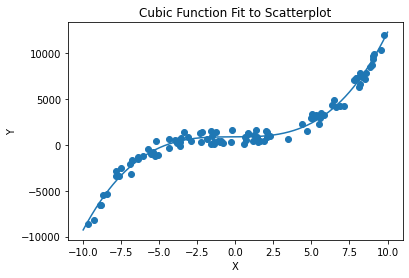


The optimized Coefficients after performing gradient descent
on non-linear single variable data for 10000 epochs and a learning rate of 1e-06 are:

* a = 10.655168698725843
* b = 20.970276527941813
* c = -1.8103041714197274
* d = 7.9893336076278585


In [87]:
# Get columns from data frame
npSingleVariable = singleVariableData.to_numpy()
x = npSingleVariable[ : , 0]
y = npSingleVariable[ : , 1]

# MSE 
t = np.polyfit(x, y, 3)
x2 = np.arange(-10, 10, .001) 

# Plot MSE Function over scatterplot
plt.scatter(x, y)
plt.plot(x2, np.polyval(t, x2))
plt.title("Cubic Function Fit to Scatterplot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Learning Rate for gradient descent
L = 0.000001
# Number of iterations for gradient descent
epochs = 10000
# Initialize coefficients
a, b, c, d = 0,0,0,0
n = float(len(x))

# Gradient Descent 
for i in range(epochs):
    # Current value of Y based on cubic function
    Y_pred = a*pow(x, 3) + b*pow(x, 2) + c*x + d
    # Get derivatives
    D_a = (-2/n) * sum(pow(x,3) * (y - Y_pred))  # Derivative wrt m
    D_b = (-2/n) * sum(pow(x,2) * (y - Y_pred))  
    D_c = (-2/n) * sum(x * (y - Y_pred))  # Derivative wrt m
    D_d = (-2/n) * sum(y - Y_pred)
    # Set coefficients
    a = a - L * D_a
    b = b - L * D_b
    c = c - L * D_c
    d = d - L * D_d

# Print results
print('\nThe optimized Coefficients after performing gradient descent\non non-linear single variable data for', epochs, 'epochs and a learning rate of', L, "are:\n")
print('* a =', a)
print('* b =', b)
print('* c =', c)
print('* d =', d)
    

## Single Variable Prediction Results

In this section, we will derive a prediction function and generate estimated results.

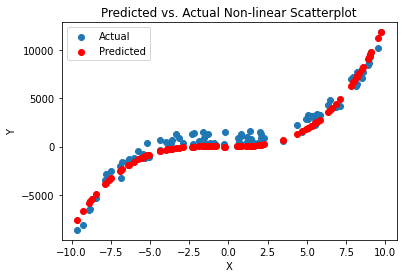

In [88]:
# Plotting predictions
plt.scatter(x, y, label = 'Actual')
plt.scatter(x,Y_pred, color = 'red', label = 'Predicted')
plt.title("Predicted vs. Actual Non-linear Scatterplot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## Multi-Variable Linear Regression

## Data Preparation
Matplotlib provides the function **Axes3D** for plotting multi=variable scatter plots. The documentation for it can be found [here](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html)

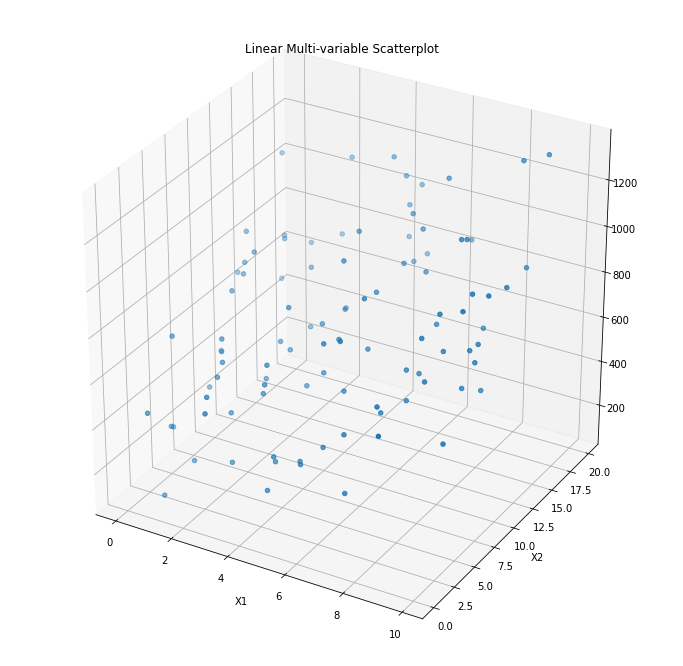

In [89]:
from mpl_toolkits.mplot3d import Axes3D

multiVariableData = pd.read_csv("data_two_variables.csv")
npmv = multiVariableData.to_numpy()
xs = npmv[ : , 0]
ys = npmv[ : , 1]
zs = npmv[ : , 2]

fig = plt.figure(111, figsize = (12,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, zs)
plt.title("Linear Multi-variable Scatterplot")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()



## Multi-variable Linear Regression

This section addresses building a regression model, estimating coefficients with data, and deriving the relationship. To do this, we will:
- Establish a linear function to describe the relationship among Y, X1, and X2.
- Compute MSE loss with observation-prediction pairs.
- Implement **Gradient Descent (GD)** to achieve optimal solution with the learning rate of **0.001 (1e-3)** and **10000 (1e4)** epochs.

In [90]:
# Initialize coefficients
m1 = 0
m2 = 0
m3 = 0

# Learning rate
L = 0.001
epochs = 10000
n = float(len(x))

# Gradient descent
for i in range(epochs):
  # Current predicted Y value
  Y_pred = m1*xs + m2*ys + m3
  # Derivatives
  D_m1 = (-2/n) * sum((xs) * (zs - Y_pred))
  D_m2 = (-2/n) * sum((ys) * (zs - Y_pred))
  D_m3 = (-2/n) * sum(zs - Y_pred)
  # Set coefficients
  m1 = m1 - L * D_m1
  m2 = m2 - L * D_m2
  m3 = m3 - L * D_m3

# Print results
print('\nThe optimized Coefficients after performing gradient descent\non linear, multi-variable data for', epochs, 'epochs and a learning rate of', L, "are:\n")
print('* m_1 =', m1)
print('* m_2 =', m2)
print('* m_3 =', m3)


The optimized Coefficients after performing gradient descent
on linear, multi-variable data for 10000 epochs and a learning rate of 0.001 are:

* m_1 = 32.73494342264618
* m_2 = 34.69592128962032
* m_3 = 222.91661391579635



## Multi-variable Prediction Results

Here, we again derive a prediction function and generate estmated results.

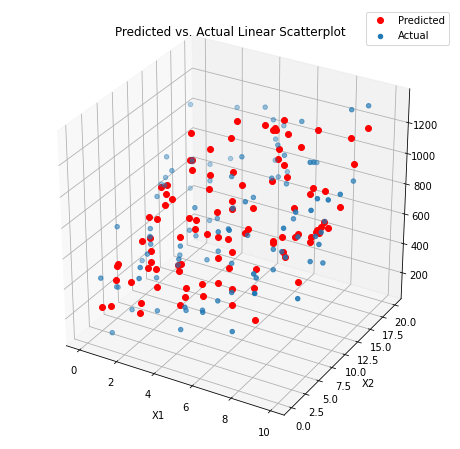

In [91]:
fig = plt.figure(figsize = [8, 8])
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs, ys, zs, label = 'Actual')
ax.plot(xs, ys, Y_pred, 'ro', label = 'Predicted')
plt.title("Predicted vs. Actual Linear Scatterplot")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()